<a href="https://colab.research.google.com/github/arthurflor23/handwritten-text-recognition/blob/master/src/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/arthurflor23/handwritten-text-recognition/blob/master/doc/image/header.png?raw=true" />

# Handwritten Text Recognition using TensorFlow 2.x

This tutorial shows how you can use the project [Handwritten Text Recognition](https://github.com/arthurflor23/handwritten-text-recognition) in your Google Colab.



## 1 Localhost Environment

We'll make sure you have the project in your Google Drive with the datasets in HDF5. If you already have structured files in the cloud, skip this step.

### 1.1 Datasets

The datasets that you can use:

a. [Bentham](http://www.transcriptorium.eu/~tsdata/)

b. [IAM](http://www.fki.inf.unibe.ch/databases/iam-handwriting-database)

c. [Rimes](http://www.a2ialab.com/doku.php?id=rimes_database:start)

d. [Saint Gall](https://fki.tic.heia-fr.ch/databases/saint-gall-database)

e. [Washington](https://fki.tic.heia-fr.ch/databases/washington-database)

### 1.2 Raw folder

On localhost, download the code project from GitHub and extract the chosen dataset (or all if you prefer) in the **raw** folder. Don't change anything of the structure of the dataset, since the scripts were made from the **original structure** of them. Your project directory will be like this:

```
.
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

After that, create virtual environment and install the dependencies with python 3 and pip:

> ```python -m venv .venv && source .venv/bin/activate```

> ```pip install -r requirements.txt```

### 1.3 HDF5 files

Now, you'll run the *transform* function from **main.py**. For this, execute on **src** folder:

> ```python main.py --source=<DATASET_NAME> --transform```

Your data will be preprocess and encode, creating and saving in the **data** folder. Now your project directory will be like this:


```
.
├── data
│   ├── bentham.hdf5
│   ├── iam.hdf5
│   ├── rimes.hdf5
│   ├── saintgall.hdf5
│   └── washington.hdf5
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

Then upload the **data** and **src** folders in the same directory in your Google Drive.

## 2 Google Drive Environment


### 2.1 TensorFlow 2.x

Make sure the jupyter notebook is using GPU mode.

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")

print("Found GPU at: {}".format(device_name))

SystemError: ignored

### 2.2 Google Drive

In [ ]:
%load_ext tensorboard

Mount your Google Drive partition.

**Note:** *\"Colab Notebooks/handwritten-text-recognition/src/\"* was the directory where you put the project folders, specifically the **src** folder.

Mounted at ./gdrive
/content/gdrive/My Drive/colabs/src
total 13770
drwx------ 2 root root     4096 Jul 12 06:40 data
-rw------- 1 root root     9074 Jul 10 21:01 main.py
drwx------ 2 root root     4096 Jul 12 06:40 network
-rw------- 1 root root   137162 Oct  4 10:25 tutorial.ipynb
-rw------- 1 root root 13945786 Sep 26 19:40 tutorial_latin.ipynb


After mount, you can see the list os files in the project folder.

## 3 Set Python Classes

### 3.1 Environment

In [ ]:
First, let's define our environment variables.

Set the main configuration parameters, like input size, batch size, number of epochs and list of characters. This make compatible with **main.py** and jupyter notebook:

* **dataset**: "bentham", "iam", "rimes", "saintgall", "washington"

* **arch**: network to run: "bluche", "puigcerver", "flor"

* **epochs**: number of epochs

* **batch_size**: number size of the batch

In [ ]:
import os
import datetime
import string

# define parameters
source = "khatt"
arch = "yazeed"
epochs = 350
batch_size = 16

# define paths
source_path = os.path.join("..", "data", f"{source}.hdf5")
output_path = os.path.join("..", "output", source, arch)
target_path = os.path.join(output_path, "checkpoint_weights_2.hdf5")
os.makedirs(output_path, exist_ok=True)

# define input size, number max of chars per line and list of valid chars
input_size = (1024, 64, 1)
max_text_length = 128
charset_base = 'ءآأإابتةثجحخدذرزسشصضطظعغفقكلمنؤهويىئ0123456789@:,.?!"()//\=-_#%$^&*+ '

print("source:", source_path)
print("output", output_path)
print("target", target_path)
print("charset:", charset_base)

source: ../data/khatt.hdf5
output ../output/khatt/yazeed
target ../output/khatt/yazeed/checkpoint_weights_2.hdf5
charset: ءآأإابتةثجحخدذرزسشصضطظعغفقكلمنؤهويىئ0123456789@:,.?!"()//\=-_#%$^&*+ 


### 3.2 DataGenerator Class

The second class is **DataGenerator()**, responsible for:

* Load the dataset partitions (train, valid, test);

* Manager batchs for train/validation/test process.

In [ ]:
from data.generator import DataGenerator

dtgen = DataGenerator(source=source_path,
                      batch_size=batch_size,
                      charset=charset_base,
                      max_text_length=max_text_length)

print(f"Train images: {dtgen.size['train']}")
print(f"Validation images: {dtgen.size['valid']}")
print(f"Test images: {dtgen.size['test']}")

Train images: 9454
Validation images: 1892
Test images: 1995


In [ ]:
logdir=output_path
tensorboard_callback

### 3.3 HTRModel Class

The third class is **HTRModel()**, was developed to be easy to use and to abstract the complicated flow of a HTR system. It's responsible for:

* Create model with Handwritten Text Recognition flow, in which calculate the loss function by CTC and decode output to calculate the HTR metrics (CER, WER and SER);

* Save and load model;

* Load weights in the models (train/infer);

* Make Train/Predict process using *generator*.

To make a dynamic HTRModel, its parameters are the *architecture*, *input_size* and *vocab_size*.

In [ ]:
from network.model import HTRModel, NNModel

# create and compile HTRModel
model = NNModel(architecture=arch,
                         input_size=input_size,
                         vocab_size=dtgen.tokenizer.vocab_size)



model.compile(learning_rate=0.001)
model.summary(output_path, "summary.txt")

# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)
# callbacks.append(tensorboard_callback)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1024, 64, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 32, 16)       160       
_________________________________________________________________
p_re_lu (PReLU)              (None, 512, 32, 16)       16        
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 32, 16)       112       
_________________________________________________________________
full_gated_conv2d (FullGated (None, 512, 32, 16)       4640      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 32, 32)       4640      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 512, 32, 32)       32    

In [ ]:
callbacks

## 4 Training

The training process is similar to the *fit()* of the Keras. After training, the information (epochs and minimum loss) is save.

In [ ]:
# to calculate total and average time per epoch
start_time = datetime.datetime.now()
print(dtgen.steps['train'])
h = model.fit(x=dtgen.next_train_batch(),
              epochs=epochs,
              steps_per_epoch=dtgen.steps['train'],
              validation_data=dtgen.next_valid_batch(),
              validation_steps=dtgen.steps['valid'],
              callbacks=callbacks,
              shuffle=True,
              verbose=1)

total_time = datetime.datetime.now() - start_time

loss = h.history['loss']
val_loss = h.history['val_loss']

min_val_loss = min(val_loss)
min_val_loss_i = val_loss.index(min_val_loss)

time_epoch = (total_time / len(loss))
total_item = (dtgen.size['train'] + dtgen.size['valid'])

t_corpus = "\n".join([
    f"Total train images:      {dtgen.size['train']}",
    f"Total validation images: {dtgen.size['valid']}",
    f"Batch:                   {dtgen.batch_size}\n",
    f"Total time:              {total_time}",
    f"Time per epoch:          {time_epoch}",
    f"Time per item:           {time_epoch / total_item}\n",
    f"Total epochs:            {len(loss)}",
    f"Best epoch               {min_val_loss_i + 1}\n",
    f"Training loss:           {loss[min_val_loss_i]:.8f}",
    f"Validation loss:         {min_val_loss:.8f}"
])

with open(os.path.join(output_path, "train.txt"), "w") as lg:
    lg.write(t_corpus)
    print(t_corpus)

591
Epoch 1/350
591/591 [==============================] - 1953s 3s/step - loss: 46.9861 - val_loss: 45.5957

Epoch 00001: val_loss improved from inf to 45.59573, saving model to ../output/khatt/yazeed/checkpoint_weights_2.hdf5
Epoch 2/350
591/591 [==============================] - 1931s 3s/step - loss: 47.9790 - val_loss: 41.6533

Epoch 00002: val_loss improved from 45.59573 to 41.65330, saving model to ../output/khatt/yazeed/checkpoint_weights_2.hdf5
Epoch 3/350
103/591 [====>.........................] - ETA: 26:34 - loss: 47.6920

In [ ]:
%tensorboard --logdir logs

## 5 Predict

The predict process is similar to the *predict* of the Keras:

Model Predict
125/125 [==============================] - 88s 706ms/step
CTC Decode
  1/125 [..............................] - ETA: 1:27

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


125/125 [==============================] - 90s 721ms/step



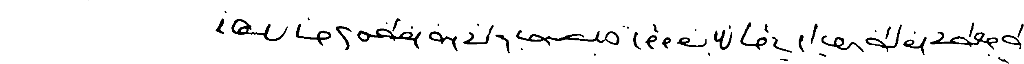

ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط
ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط 




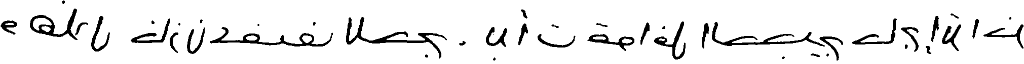

وهلال خازن عفيف للحج.    بدأت قوافل الحجيج حاج إثر آخر
وهلال خازن عف لحج . بدأت قوافل الحجيج حاج إثر آخر 




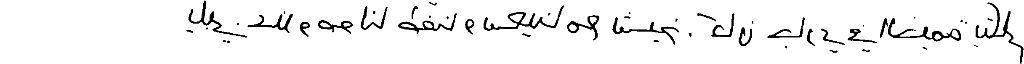

يلبي. عند وصولنا طفنا وسعينا مع شيخ. كان جاري في الخيمة يتكلم
يلبي عند وصولنا طفنا وسعينا مع شيخ . كان جاري في الخيمة يتكلم 




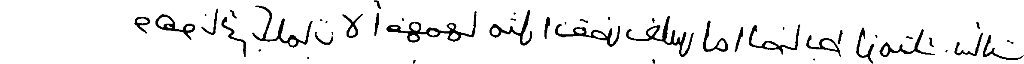

وهو نائم  بكلمات لا أفهمها مثل انقض بغلس له الضابط لزمتك.   سألت
وهو نائم بكلمات لا أفهمها مثل انقض بغلس له الضابط لزمتك . سألت 




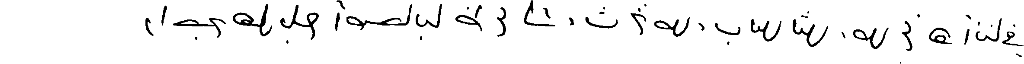

راجح هل بلغ أصحابنا ظ ع ك  ث خ ض ب س ش ص غ ه أننا في
راجح هل بلغ أصحابنا ظ ع ك ث خ ض ب س ش ص غ ه أنا في 




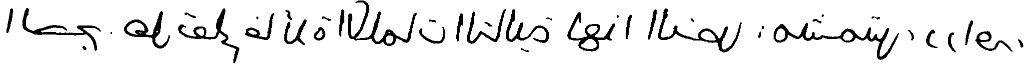

الحج  هل تعلم فائدة الكلمات التالية لهذا النص: مشمش دراق
الحج . هل تعلم فائدة الكلمات التالية لهذا النص : مشمش دراق 




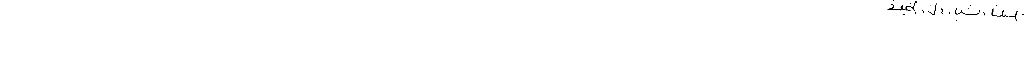

غيظ ناء   بث  نسر .
غيظ ناء بث نسر . 




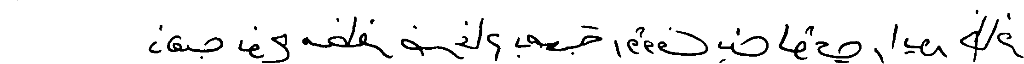

ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر
ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر 




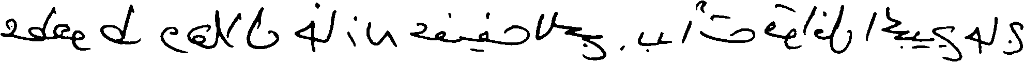

عطعوط وهلال خازن عفيف للحج.    بدأت قوافل الحجيج حاج
عطعوط وهلال خازن عفيف لحج . بدأت قوافل الحجيج حاج 




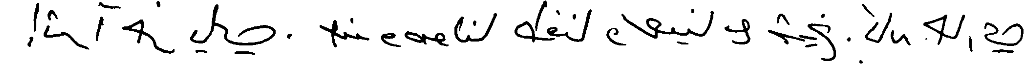

إثر آخر يلي .عند وصولنا طفنا وسعينا مع شيخ. كان جاري
إثر آخر يالي . عند وصولنا طفنا وسعينا مع شيخ . كان جاري 




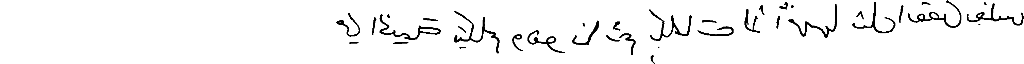

في الخيمة يتكلم وهو نائم  بكلمات لأ أفهمها مثل انقض بغلس
في الخيمة يتكلم وهو نائم بكلمات لا أفهمها مثل انقض بغلس 




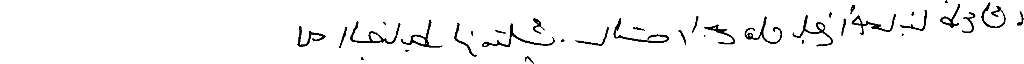

له الضابط لزمتك.   سألت راجح هل بلغ أصحابنا ظ ع ك 
له الضابط لزمتك . سألت راجح هل بلغ أصحابنا ظ ع ك 




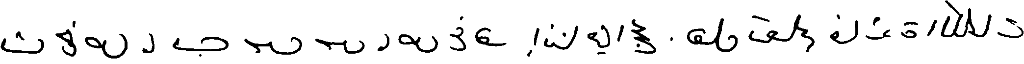

ث خ ض ب س ش ص غ ه إننا في الحج.  هل تعلم فائدة الكلمات
ث خ ض ب س ش ص غ ه أنا في الحج . هل تعلم فائدة الكلمات 




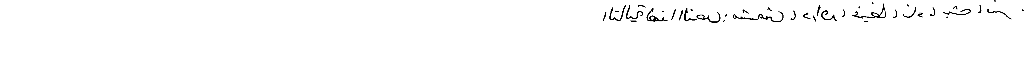

التالية لهذا النص: مشمش دراق غيظ ناء   بث  نسر .
الال ها الص : مش دراق غيظ ناء بث نسر . 




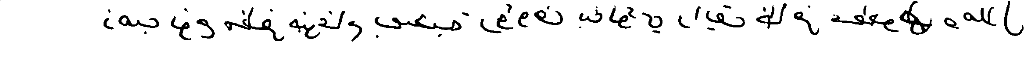

ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال
ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال 




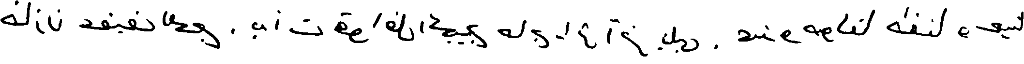

خازن عفيف للحج.    بدأت قوافل الحجيج حاج إثر آخر يلبي.عند وصولنا طفنا وسعينا
خازن عفيف لحج . بدأت قوافل الحجيج حاج إثر آخر يلبي . عند وصولنا طفنا وسعينا 




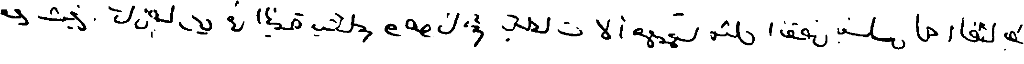

مع شيخ. كان جاري  في الخيمة يتكلم وهو نائم  بكلمات لا أمهمها مثل انقض بفسلس له الظتابط
مع شيخ . كان جاري في الخيمة يتكلم وهو نائم بكلمات لا أفهمها مثل انقض بغلس له الضابط 




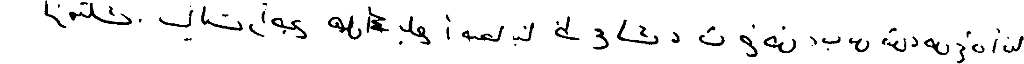

لزمتك.   سألت راجح هل # بلغ أصحابنا ظ ع ك  ث خ ض ب س ش ص غ ه أننا
لزمتك . سألت راجح هل ا # بلغ أصحابنا ظ ع ك ث خ ض ب س ش ص غ ه أنا 




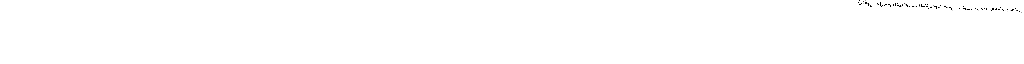

في الحج.  هل تعلم فائدة الكلمات التالية لهذا النص: مشمس دراق غيظ ناء   بث  نس .
ال ا ا ة له النص مشدراق غيظ ناء بث نسر . 




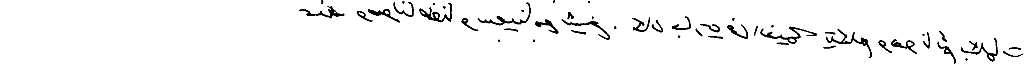

عند وصولنا طفنا وسعينا مع شيخ. كان جاري في الخيمة يتكلم وهو نائم  بكلمات
عند وصولنا طفنا وسعينا مع شيخ . كان جاري في الخيمه يتكلم وهو نائم بكلمات 




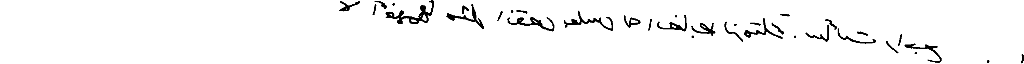

لا أفهمها مثل انقض بغلس له الضابط لزمتك.   سألت راجح هل بلغ أصحابنا
لا أفهمها مثل انقض بغلس له الضابط لزمتك . سألت راجح 




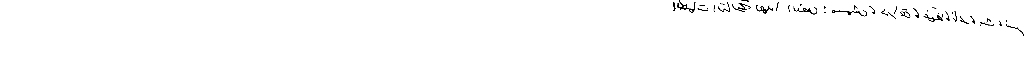

الكلمات التالية لهذا النص: مشمش دراق غيظ ناء   بث  نسر
لهذا النص : مشدراق غيظ ناء بث نسر . 




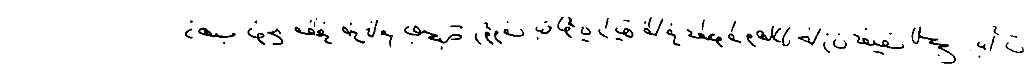

ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال خازن عفيف للحج.  بدأت
ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال خازن عفيف لحج . بدأت 




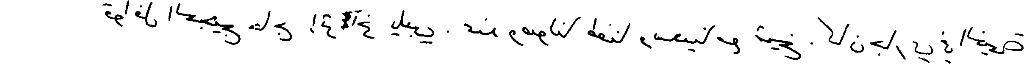

قوافل الحجيج حاج إثر آخر يلبي.  عند وصولنا طفنا وسعينا مع شيخ. كان جاري في الخيمة
قوافل الحجيج حاج إثر آخر يلبي . عند وصولنا طفنا وسعينا مع شيخ . كان جاري في الخيمة 




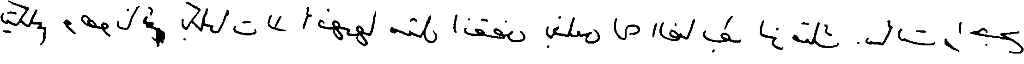

يتكلم وهو نائم  بكلمات لا أفهمها مثل انقض بغلس له الضابط لزمتك.   سألت راجح
يتكلم وهو نائم بكلمات لا أفهمها مثل انقض بغلس له الضابط لزمتك . سألت راجح 




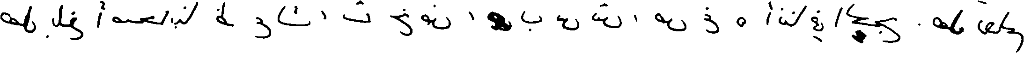

هل بلغ أصحابنا ظ ع ك  ث خ ض # ب س ش ص غ ه أننا في الحج.  هل تعلم
هل بلغ أصحابنا ظ ع ك ث خ ض # ب س ش ص غ ه أنا في الحج . هل تعلم 




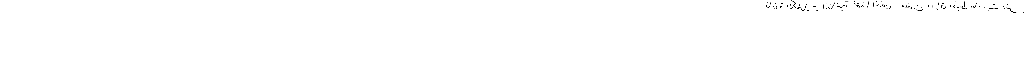

فائدة الكلمات التالية لهذا النص: مشمش دراق غيظ ناء   بث  نسر.
ا اة لهذ النص : مش دراق غيظ ناء بث نسر . 




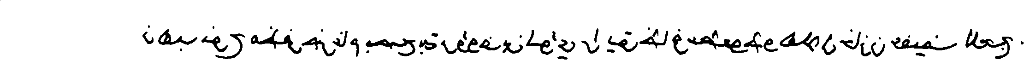

ذهب نوح مظفر ضرغام بصح بة رؤوف بن لؤي رايق ظافر عطعوط وهلال خازن عفيف للحج.
ذهب نوح مظفر ضرغام بصح بة رؤوف بن لؤي رايق ظافر عطعوط وهلال خازن عفيف لحج . 




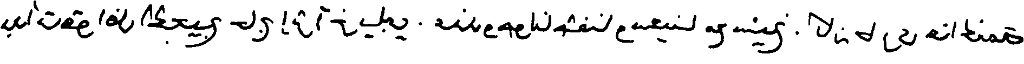

بدأت قوافل الحجيج حاج إثر آخر يلبي.  عند وصولنا طفنا وسعينا مع شيخ. كان جاري في الخيمة
بدأت قوافل الحجيج حاج إثر آخر يلبي . عند وصولنا طفنا وسعينا مع شيخ . كان جاري ف الخيمة 




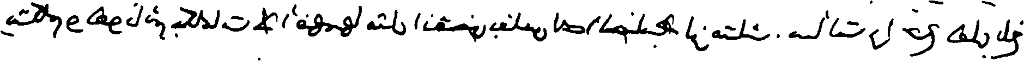

يتكلم وهو نائم  بكلمات لا أفهمها مثل انقض بغلس له الضابط لزمتك.   سألت راجح هل بلغ
يتكلم وهو نائم بكلمات لا أفهمها مثل انقض بغلس له الضابط لزمتك . سألت راجح هل بلغ 




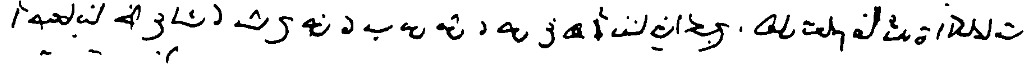

أصحابنا ظ ع ك  ث خ ض ب س ش ص غ ه أننا في الحج.  هل تعلم فائدة الكلمات
أصحابنا ظ ع ك ث خ ض ب س ش ص غ ه أنا في الحج . هل تعلم فائدة الكلمات 




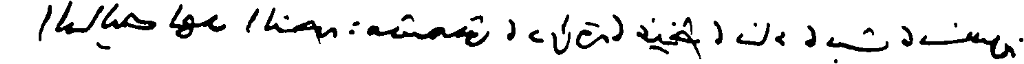

التالية لهذا النص: مشمش دراق غيظ ناء   بث  نسر.
العال له النص : مشم دراق غيظ ناء بث نس . 




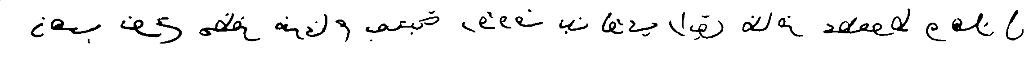

ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال
ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال 




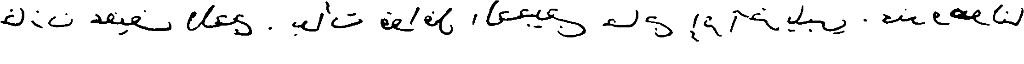

خازن عفيف للحج.  بدأت قوافل الحجيج حاج إثر آخر يلبي.  عند وصولنا
خازن عفيف لحج . بدأت قوافل الحجيج حاج إثر آخر يلبي . عند وصولنا 




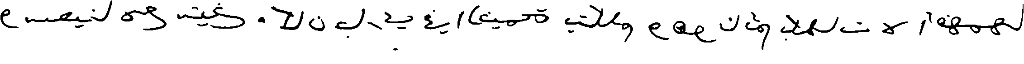

وسعينا مع شيخ . كان جاري في الخيمة يتكلم وهو نائم  بكلمات لا أفهمها
وسعينا مع شيخ . كان جاري في الخيمة يتكلم وهو نائم بكلمات لا أفهمها 




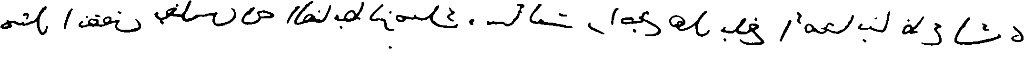

مثل انقض بغلس له الضابط لزمتك.   سألت راجح هل بلغ أصحابنا ظ ع ك 
مثل انقض بغلس له الضابط لزمتك . سألت راجح هل بلغ أصحابنا ظ ع ك 




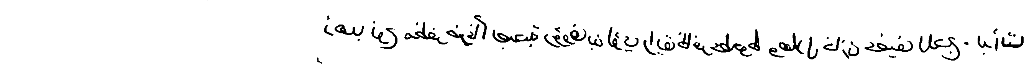

ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال خازن عفيف للحج.  بدأت
ذهب نوح مظفر ضرغم بصبة رؤف ب لؤي راق ظافر عطعوط وهلال خازن عفيف لحج . بدأت 




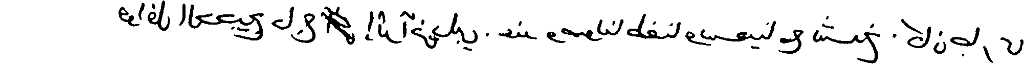

قوافل الحجيج حاج # إثر آخر يلبي.  عند وصولنا طفنا وسعينا مع شيخ. كان جاري
قوافل الحجيج حاج # إثر آخر يلبي . عند وصولنا طفنا وسعينا مع شيخ . كان جاري 




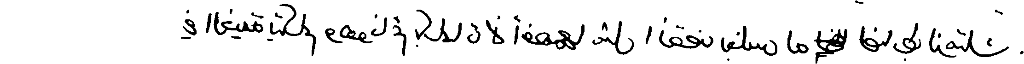

في الخيمة يتكلم وهو نائم  بكلمات لا أفهمها مثل انقض بغلس له # الضابط لزمتك.
في الخيمة يتكلم وهو نائم بكلمات لا أفهمها مثل انقض بغلس له له الضابط لزمتك . 




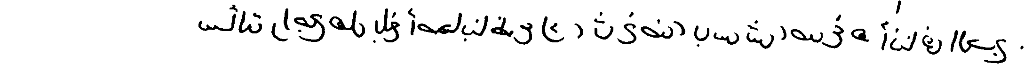

سألت راجح هل بلغ أصحابنا ظ ع ك  ث خ ض ب س ش ص غ ه أننا في الحج.
سألت راجح هل بلغ أصحابنا ظ ع ك ث خ ض ب س ش ص غ ه أنا في الحج . 




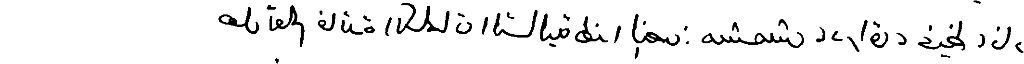

هل تعلم فائدة الكلمات التالية لهذا النص: مشمش  دراق  غيظ  ناء
هل تعلم فائدة الكلمات التالية لهذا النص : مشمش دراق غيظ ناء 




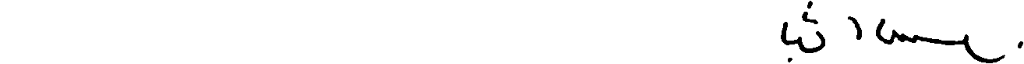

بث  نسر .
بن لسر . 




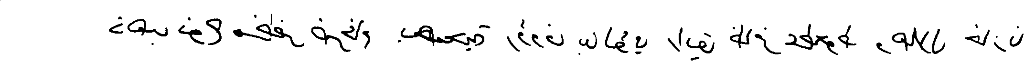

ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال خازن
ذهب نوح مظفر ضرغام بصحبة رؤوف بن لؤي رايق ظافر عطعوط وهلال خازن 




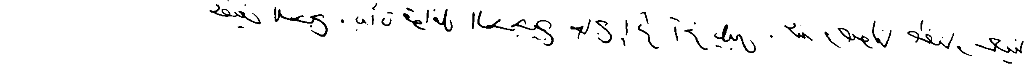

عفيف للحج .  بدأت قوافل الحجيج حاج إثر آخر يلبي .  عند وصولنا طفنا وسعينا
عفيف لحج . بدأت قوافل الحجيج حاج إثر آخر يلبي . عند وصولنا طفنا وسعينا 




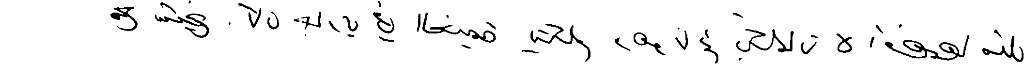

مع شيخ. كان جاري في الخيمة يتكلم وهو نائم  بكلمات لا أفهمها مثل
مع شيخ . كان جاري في الخيمة يتكلم وهو نائم بكلمات لا أفهمها مثل 




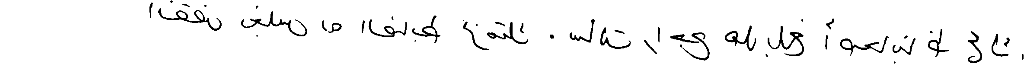

انقض بغلس له الضابط لزمتك.   سألت راجح هل بلغ أصحابنا ظ ع ك 
انقض بغلس له الضابط لزمتك . سألت راجح هل بلغ أصحابنا ظ ع ك 




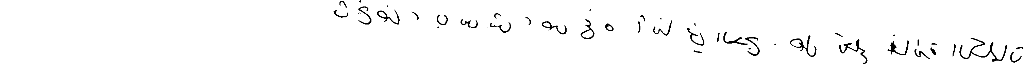

ث خ ض ب س ش ص غ ه أننا في الحج.  هل تعلم فائدة الكلمات
ث خ ض ب س ش ص غ ه أنا في الحج . هل تعلم فائدة الكلمات 




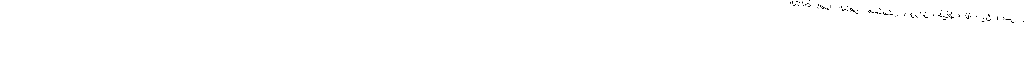

التالية لهذا النص: مشمش دراق غيظ ناء   يث  نسر.
ان مش دراق غيظ ناء بث نسر . 




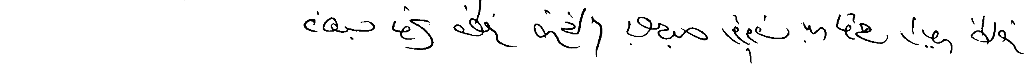

ذهب نوح مظفر ضرغام بصحبه رؤوف بن لؤى رايق ظافر
ذهب نوح مظفر ضرغام بصحبه رؤوف بن لؤي رايق ظافر 




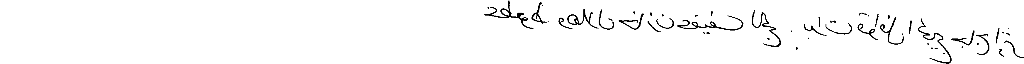

عطعوط وهلال خازن عفيف للحج .  بدأت قوافل الحجيج جاج إثر
عطوط وهلال خازن عفيف لحج . بدأت قوفل الحجيج جاج إثر 



In [10]:
from data import preproc as pp
from google.colab.patches import cv2_imshow

start_time = datetime.datetime.now()

# predict() function will return the predicts with the probabilities
predicts, _ = model.predict(x=dtgen.next_test_batch(),
                            steps=dtgen.steps['test'],
                            ctc_decode=True,
                            verbose=1)


# decode to string
predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]
ground_truth = [x.decode() for x in dtgen.dataset['test']['gt']]

total_time = datetime.datetime.now() - start_time

# mount predict corpus file
with open(os.path.join(output_path, "predict.txt"), "w") as lg:
    for pd, gt in zip(predicts, ground_truth):
        lg.write(f"TE_L {gt}\nTE_P {pd}\n")
   
for i, item in enumerate(dtgen.dataset['test']['dt'][:50]):
    print("=" * 1024, "\n")
    cv2_imshow(pp.adjust_to_see(item))
    print(ground_truth[i])
    print(predicts[i], "\n")

## 6 Evaluate

Evaluation process is more manual process. Here we have the `ocr_metrics`, but feel free to implement other metrics instead. In the function, we have three parameters: 

* predicts
* ground_truth
* norm_accentuation (calculation with/without accentuation)
* norm_punctuation (calculation with/without punctuation marks)

In [11]:
from data import evaluation

evaluate = evaluation.ocr_metrics(predicts, ground_truth)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)

Total test images:    1995
Total time:           0:03:52.146222
Time per item:        0:00:00.116364

Metrics:
Character Error Rate: 0.18584907
Word Error Rate:      0.42895647
Sequence Error Rate:  0.94235589
